Basic Ensemble Learning: Max voting , Average ,Weighted Average

FOR CLASSIFICATION


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sb
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from sklearn.datasets import make_moons

In [30]:
x,y=make_moons(n_samples=500,noise=0.2)

In [31]:
da={"x1":x[:,0],"x2":x[:,1],"y":y}

In [32]:
df=pd.DataFrame(da)
df.head()

,x1,x2,y
0,0.379385,1.017813,0
1,0.788733,-0.374742,1
2,0.409016,0.798566,0
3,-0.086591,0.404720,1
4,0.960698,-0.594215,1


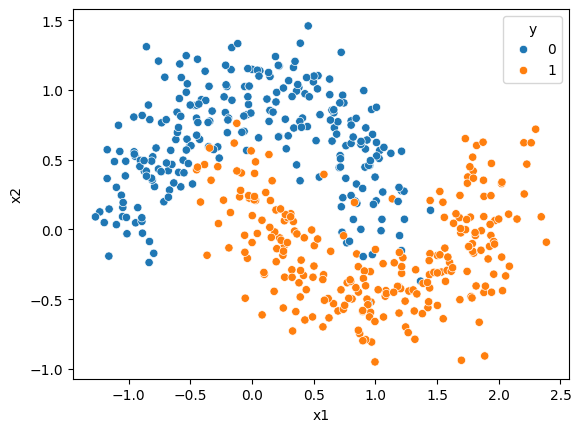

In [33]:
sb.scatterplot(data=df,x=df["x1"],y=df["x2"],hue="y")
mat.show()

In [40]:
x_a=df.drop(columns="y")
y_a=df["y"]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,train_size=0.2,random_state=42)

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [80]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train),dt.score(x_test,y_test)

(1.0, 0.9)

In [81]:
svm=SVC()
svm.fit(x_train,y_train)
svm.score(x_train,y_train),svm.score(x_test,y_test)

(0.6, 0.475)

In [82]:
gb=GaussianNB()
gb.fit(x_train,y_train)
gb.score(x_train,y_train),gb.score(x_test,y_test)

(0.9, 0.925)

In [83]:
from sklearn.ensemble import VotingClassifier

In [84]:
l=[("dt1",DecisionTreeClassifier()),("sv",SVC()),("gb1",GaussianNB())]

In [85]:
vc=VotingClassifier(l)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv', SVC()),
                             ('gb1', GaussianNB())])

In [86]:
vc.score(x_train,y_train),vc.score(x_test,y_test)

(0.95, 0.8875)

In [100]:
da={"dt":dt.predict(x_test),"svc":svm.predict(x_test),"gb":gb.predict(x_test),"vc":vc.predict(x_test)}
da_d=pd.DataFrame(da)
da_d

,dt,svc,gb,vc
0,1.0,1,1,1
1,1.0,1,1,1
2,1.0,1,1,1
3,0.0,1,1,1
4,1.0,1,1,1
...,...,...,...,...
75,1.0,1,1,1
76,0.0,1,0,0
77,1.0,1,1,1
78,0.0,1,0,0


FOR REGRESSION

In [88]:
data=pd.DataFrame(pd.read_csv("E:\\Study\\AIDS\\DS\\ML\\placement.csv"))

In [89]:
data.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [90]:
x=data.drop(columns="placement")
y=data["placement"]
x,y

(    cgpa   iq
 0    6.8  123
 1    5.9  106
 2    5.3  121
 3    7.4  132
 4    5.8  142
 ..   ...  ...
 95   4.3  200
 96   4.4   42
 97   6.7  182
 98   6.3  103
 99   6.2  113
 
 [100 rows x 2 columns],
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 95    0
 96    0
 97    1
 98    1
 99    1
 Name: placement, Length: 100, dtype: int64)

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)


In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [123]:
li=LinearRegression()
li.fit(x_train,y_train)
li.score(x_train,y_train)*100,li.score(x_test,y_test)*100

(61.80644498150817, 63.76114649809188)

In [124]:
dt_r=DecisionTreeRegressor()
dt_r.fit(x_train,y_train)
dt_r.score(x_train,y_train)*100,dt_r.score(x_test,y_test)*100

(100.0, 59.89974937343357)

In [125]:
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)*100,svr.score(x_test,y_test)*100

(9.972723461203847, -45.93784840995221)

In [126]:
from sklearn.ensemble import VotingRegressor

In [127]:
lis=[("li1",LinearRegression()),("DT1",DecisionTreeRegressor()),("svr",SVR())]

In [128]:
vr=VotingRegressor(lis)
vr.fit(x_train,y_train)

VotingRegressor(estimators=[('li1', LinearRegression()),
                            ('DT1', DecisionTreeRegressor()), ('svr', SVR())])

In [129]:
vr.score(x_train,y_train)*100,vc.score(x_test,y_test)

(77.97965988030809, 0.8875)

In [130]:
de={"lr":li.predict(x_test),"dt":dt_r.predict(x_test),"svr":svr.predict(x_test),"vr":vr.predict(x_test)}
de_d=pd.DataFrame(de)
de_d

,lr,dt,svr,vr
0,1.158530,1.0,0.731833,0.963455
1,1.471264,1.0,1.002536,1.157933
2,0.637673,1.0,0.702091,0.779921
3,0.565206,0.0,0.523717,0.362974
4,1.224664,1.0,0.558182,0.927615
...,...,...,...,...
75,0.722086,1.0,0.729490,0.817192
76,-0.057248,0.0,0.999675,0.314142
77,0.931682,1.0,0.810497,0.914060
78,0.011247,0.0,0.625756,0.212334
